Import Libraries

In [77]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets


File Upload

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FlightDelays.csv to FlightDelays.csv


Read the csv file

In [146]:
import io
df=pd.read_csv('/content/FlightDelays.csv')

**DATA VISUALISATION**

---

In [ ]:
# distribution of no. of flights ontime and delayed on every day of week
Ontime=[0,0,0,0,0,0,0]
Delay=[0,0,0,0,0,0,0]
for i in range(2201):
  if df.iloc[i,12]=="ontime":
    Ontime[df.iloc[i,9]-1]+=1
  else:
    Delay[df.iloc[i,9]-1]+=1


# distribution of no. of flights ontime and delayed on every day of month
from itertools import repeat
Ontime_M=list(repeat(0, 31))
Delay_M=list(repeat(0,31))
for i in range(2201):
  if df.iloc[i,12]=="ontime":
    Ontime_M[df.iloc[i,10]-1]+=1
  else:
    Delay_M[df.iloc[i,10]-1]+=1

# distribution of no. of flights ontime and delayed for weather conditions
Delay_W=[0,0]
Ontime_W=[0,0]
for i in range(2201):
  if df.iloc[i,12]=="ontime":
     Ontime_W[df.iloc[i,8]]+=1
  else: Delay_W[df.iloc[i,8]]+=1



No. of flights v/s Days of Week (Ontime and Delayed)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(7)
ax.bar(X + 0.00,Ontime,color = 'b', width = 0.25,label="Ontime")
ax.bar(X+0.25,Delay,color = 'r', width = 0.25,label="Delay")
plt.xlabel('Days of Week')
plt.ylabel('No. of flights')
plt.legend()
plt.show()

Weather v/s No. of delayed flights

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(2)
ax.bar(X + 0.00,Ontime_W,color = 'b', width = 0.1,label="Ontime")
ax.bar(X,Delay_W,color = 'r', width = 0.1,label="Delay")
plt.xlabel('Weather')
plt.ylabel('No. of flights')
plt.legend()
plt.show()

No. of flights v/s Days of Month (Ontime and Delayed)

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
X = np.arange(31)
ax1.bar(X + 0.00,Ontime_M,color = 'b', width = 0.3,label="Ontime")
ax1.bar(X+0.3,Delay_M,color = 'r', width = 0.3,label="Delay")
plt.xlabel('Days of Month')
plt.ylabel('No. of flights')
plt.legend()
plt.show()

Histograms

In [ ]:
#Distribution of distances
sns.histplot(df['DISTANCE'],kde = False)
plt.show()

#distribution of total no of flights on weekdays
sns.histplot(df['DAY_WEEK'],kde = False)
plt.show()

#distribution of total no of flights on days of month
sns.displot(df['DAY_OF_MONTH'],kde=False)
plt.show()

**Adding another feature**

In [147]:
#adding another attribute 'delay at origin airport'
df['DELAY_AT_ORIGIN'] = 60*(df['DEP_TIME']//100-df['CRS_DEP_TIME']//100) + (df['DEP_TIME']%100-df['CRS_DEP_TIME']%100)

#corection for time delay as CRS dept time and dept time are on two different days
df.iloc[1270,13]=170
df.iloc[1606,13]=229

Box plot for Delay at Origin v/s Origin





In [ ]:
#box plot 
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='DELAY_AT_ORIGIN',
    x='ORIGIN'
)
ax.set_title('Delay at origin in minutes')

Box plot for Delay at Origin v/s Carrier

In [ ]:
#box plot 
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='DELAY_AT_ORIGIN',
    x='CARRIER'
)
ax.set_title('Delay at origin in minutes')

**PRE-PROCESSING**

In [148]:
#to convert FL_DATE column to int 
for i in range(2201):
  df.iloc[i,5]=df.iloc[i,10]

In [149]:
#converting carrier, dest and origin classes to 1,2,3 etc
cleanup_nums = {"CARRIER":     {"CO": 1, "DH": 2,"DL":3,"MQ":4,"OH":5,"RU":6,"UA":7,"US":8},
                "DEST": {"JFK": 1, "LGA": 2, "EWR": 3},
                "ORIGIN": {"DCA":1,"IAD":2,"BWI":3}
                }

df = df.replace(cleanup_nums)


In [150]:
#converting TAIL_NUM string to int, for example N940CA is converted to 94031 
for i in range(2201):
  df.iloc[i,11]=df.iloc[i,11][1:6]
  a=df.iloc[i,11][-1]
  b=df.iloc[i,11][-2]
  df.iloc[i,11] = df.iloc[i,11][:-2]
  try:
    m=int(a)
  except:
    a=str(ord(a)-64)
    df.iloc[i,11] = df.iloc[i,11]+a
  try:
    m=int(b)
  except:
    b=str(ord(b)-64)
    df.iloc[i,11] = df.iloc[i,11]+b
    df.iloc[i,11] = int(df.iloc[i,11])



In [108]:
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,DELAY_AT_ORIGIN
0,1455,5,1455,1,184,1,5935,3,0,4,1,94013,ontime,0
1,1640,2,1640,1,213,1,6155,1,0,4,1,405106,ontime,0
2,1245,2,1245,2,229,1,7208,2,0,4,1,695182,ontime,0
3,1715,2,1709,2,229,1,7215,2,0,4,1,662182,ontime,-6
4,1039,2,1035,2,229,1,7792,2,0,4,1,698182,ontime,-4


Feature Extraction 

In [151]:
X = df.iloc[:, :-2].values
X=np.column_stack((X,df['DELAY_AT_ORIGIN'].values))
from sklearn.preprocessing import StandardScaler
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = df.iloc[:, -2].values
m,n=X.shape
Y=Y.reshape((m,1))



Dividing into training and test data

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)


Training with Logistic Regression Model

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction

In [141]:
Ypred_dt_train=logreg.predict(X_train)
Ypred_dt_test=logreg.predict(X_test)

Performance of Model

Accuracy in test data:  0.9091940976163451
Accuracy of train data:  0.9295454545454546


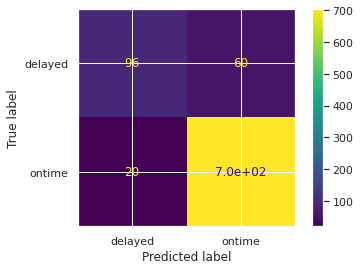

In [142]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay,classification_report
print("Accuracy in test data: ", accuracy_score(Y_test,Ypred_dt_test))
print("Accuracy of train data: ", accuracy_score(Y_train,Ypred_dt_train))
cm = confusion_matrix(Y_test, Ypred_dt_test,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()

In [143]:
print(classification_report(Y_test, Ypred_dt_test))

              precision    recall  f1-score   support

     delayed       0.83      0.62      0.71       156
      ontime       0.92      0.97      0.95       725

    accuracy                           0.91       881
   macro avg       0.87      0.79      0.83       881
weighted avg       0.90      0.91      0.90       881



Coefficients and Intercept 

In [144]:
print(logreg.coef_,logreg.intercept_)


[[ 1.13938369  0.36117496 -1.29541581 -0.31976855 -0.14863163 -0.11183936
   0.64239102 -0.29689002 -5.5755909   0.02911057 -0.11183936 -0.36958275
  -4.1500293 ]] [0.77427498]


VARIABLE SELECTION

In [152]:
df.drop('FL_DATE', axis=1, inplace=True)
df.drop('TAIL_NUM', axis=1, inplace=True)
df.drop('FL_NUM', axis=1, inplace=True)
df.drop('DEP_TIME', axis=1, inplace=True)
df.drop('CRS_DEP_TIME', axis=1, inplace=True)
df.drop('DEST', axis=1, inplace=True)
df.drop('ORIGIN', axis=1, inplace=True)
df.drop('DAY_WEEK', axis=1, inplace=True)


**NEW FEATURE VECTOR**

In [153]:
X = df.iloc[:, :-2].values
X=np.column_stack((X,df['DELAY_AT_ORIGIN'].values))
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
m,n=X.shape
print(m,n)

Y = df.iloc[:, -2].values

2201 7


DIviding into training and test data

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)


**Training the new model**

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)




LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction

In [156]:
Ypred_dt_train=logreg.predict(X_train)
Ypred_dt_test=logreg.predict(X_test)

Accuracy

Accuracy in test data:  0.9284903518728718
Accuracy of train data:  0.918939393939394


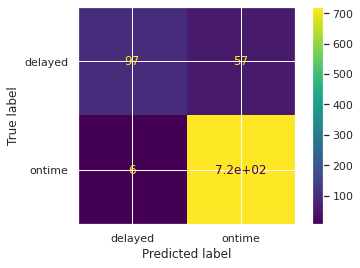

In [157]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
print("Accuracy in test data: ", accuracy_score(Y_test,Ypred_dt_test))
print("Accuracy of train data: ", accuracy_score(Y_train,Ypred_dt_train))
cm = confusion_matrix(Y_test, Ypred_dt_test,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()

In [132]:
print(classification_report(Y_test, Ypred_dt_test))

              precision    recall  f1-score   support

     delayed       0.90      0.64      0.75       176
      ontime       0.92      0.98      0.95       705

    accuracy                           0.91       881
   macro avg       0.91      0.81      0.85       881
weighted avg       0.91      0.91      0.91       881



(2201, 5)
